<a href="https://colab.research.google.com/github/Arvinzaheri/smart_trash/blob/main/cv_final_EX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q --upgrade keras-cv tensorflow
!pip install -q --upgrade keras  # Upgrade to Keras 3.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 613.1/613.1 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 589.8/589.8 MB 1.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 68.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 53.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 55.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 311.2/311.2 kB 30.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.15.1 requires tensorflow<2.16,>=2.15, but you have tensorflow 2.16.1 which is incompatible.


In [2]:
import keras
import keras_cv

In [ ]:
#now we use os to count the number of images in each folder label

path = "/content/drive/MyDrive/TrashType_Image_Dataset"

folders = os.listdir(path)

print(folders)

for folder in folders:
  print(len(os.listdir(f"/content/drive/MyDrive/TrashType_Image_Dataset/{folder}")))


['glass', 'metal', 'plastic', 'paper', 'cardboard', 'trash']
501
410
482
594
403
137


#we can see that trash is less than other labels so after loading the data we need to increase the number of images in trash label

In [ ]:
import os
import numpy as np
from sklearn.model_selection import train_test_split
from torchvision import transforms
from torchvision.datasets import ImageFolder

# Define the list of folders (class labels)

# Create X_data (list of image paths) and y_labels (list of corresponding labels)
X_data = np.array([])
y_labels = np.array([])

for folder in folders:
    for image in os.listdir(f"/content/drive/MyDrive/TrashType_Image_Dataset/{folder}"):
        X_data = np.append(X_data, f"/content/drive/MyDrive/TrashType_Image_Dataset/{folder}/{image}")
        y_labels = np.append(y_labels, folder)

# Assuming you have flattened image data and labels
# First, apply SMOTE to oversample the minority class

from imblearn.over_sampling import RandomOverSampler

sampler = RandomOverSampler(random_state=42)

#X_train_oversampled, y_train_oversampled = sampler.fit_resample(X_data.reshape(-1, 1), y_labels.reshape)


X_train, X_test, y_train, y_test = train_test_split(X_train_oversampled, y_train_oversampled, test_size=0.17, random_state=42, stratify=y_train_oversampled)

# Create train and test directories
os.mkdir("./train")
os.mkdir("./test")

for folder in folders:
    os.mkdir(f"./train/{folder}")
    os.mkdir(f"./test/{folder}")



In [ ]:
X_train = X_train.reshape(-1)
X_test = X_test.reshape(-1)
y_train = y_train.reshape(-1)
y_test = y_test.reshape(-1)

In [ ]:
import os
import shutil

# Define source and destination directories
source_dir = "./"
train_dir = "./train/"
test_dir = "./test/"

# Create train and test directories if they don't exist
os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

# Keep track of image counts for each label
image_counts = {}

# Copy images to train and test directories based on their labels
for image, label in zip(X_train, y_train):
    base_name = os.path.basename(image)
    destination = os.path.join(train_dir, label, base_name)

    # Check if the image already exists
    if base_name in image_counts:
        image_counts[base_name] += 1
        new_base_name = f"{os.path.splitext(base_name)[0]}_{image_counts[base_name]}{os.path.splitext(base_name)[1]}"
        destination = os.path.join(train_dir, label, new_base_name)
    else:
        image_counts[base_name] = 1

    shutil.copy(image, destination, )

# Repeat the same process for test images
for image, label in zip(X_test, y_test):
    base_name = os.path.basename(image)
    destination = os.path.join(test_dir, label, base_name)

    if base_name in image_counts:
        image_counts[base_name] += 1
        new_base_name = f"{os.path.splitext(base_name)[0]}_{image_counts[base_name]}{os.path.splitext(base_name)[1]}"
        destination = os.path.join(test_dir, label, new_base_name)
    else:
        image_counts[base_name] = 1

    shutil.copy(image, destination)

# Print a success message
print("Images were successfully copied to train and test directories based on their labels.")
# Define your data transformation
data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.ToTensor(),
])

# Create train and test datasets
#train_dataset = ImageFolder(root="./train", transform=data_transform)
#test_dataset = ImageFolder(root="./test", transform=None)  # Apply the same transformation

print("Train and test datasets created successfully.")


Images were successfully copied to train and test directories based on their labels.
Train and test datasets created successfully.


In [ ]:
#now we make a copy of train and test directories in google drive

!cp -r ./train /content/drive/MyDrive
!cp -r ./test /content/drive/MyDrive

In [2]:
from torchvision import transforms
from torchvision.datasets import ImageFolder
import torch

data_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomVerticalFlip(),
    transforms.RandomRotation(10),
    transforms.RandomAffine(0, shear=10, scale=(0.8, 1.2)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.ToTensor(),
])

test_transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    transforms.ToTensor(),
])

# Create train and test datasets
train_dataset = ImageFolder(root="/content/drive/MyDrive/train", transform=data_transform)
test_dataset = ImageFolder(root="/content/drive/MyDrive/test", transform=test_transform)


train_dataloader = torch.utils.data.DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = torch.utils.data.DataLoader(test_dataset, batch_size=16)

In [ ]:
#check for gpu availability

if torch.cuda.is_available():
  device = torch.device("cuda")
else:
  device = torch.device("cpu")
device

device(type='cuda')

In [ ]:
!pip install lightning

In [4]:
from torch import nn
from torchvision import models
import lightning as L

backbone = models.efficientnet_v2_m(
    weights="DEFAULT",
    progress=True,)

Downloading: "https://download.pytorch.org/models/efficientnet_v2_m-dc08266a.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_v2_m-dc08266a.pth
100%|██████████| 208M/208M [00:02<00:00, 79.6MB/s]


In [5]:
backbone = nn.Sequential(*list(backbone.children())[:-1])

In [6]:
import lightning as L
class TrashClassifier(L.LightningModule):
    def __init__(self, backbone, f1_score=None, accuracy=None, recall=None, precision=None):
        super().__init__()
        self.backbone = backbone
        self.backbone.requires_grad_(False)
        self.classifier = nn.Linear(1280, 6)
        #self.activation = nn.Softmax(dim=1)
        self.f1_score = f1_score
        self.accuracy = accuracy
        self.recall = recall
        self.precision = precision

    def forward(self, x):
        x = self.backbone(x)
        x = torch.flatten(x, 1)
        x = self.classifier(x)
        #x = self.activation(x)
        return x

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = nn.CrossEntropyLoss()(y_hat, y)
        self.log("train_loss", loss)
        self.log("train_accuracy", self.accuracy(y_hat, y), prog_bar=True)
        self.log("train_f1_score", self.f1_score(y_hat, y), prog_bar=True)
        self.log("train_recall", self.recall(y_hat, y), prog_bar=True)
        self.log("train_precision", self.precision(y_hat, y), prog_bar=True)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self.forward(x)
        loss = nn.CrossEntropyLoss()(y_hat, y)
        self.log("val_loss", loss)
        self.log("val_accuracy", self.accuracy(y_hat, y), prog_bar=True)
        self.log("val_f1_score", self.f1_score(y_hat, y), prog_bar=True)
        self.log("val_recall", self.recall(y_hat, y), prog_bar=True)
        self.log("val_precision", self.precision(y_hat, y), prog_bar=True)
        return loss

    def configure_optimizers(self):
        optimizer = torch.optim.Adam(self.parameters(), lr=0.001)
        return optimizer

#we set a metric for our model [Accuracy, f1_score, etc]
#also we need the classification report

from torchmetrics import Accuracy, F1Score, Precision, Recall

accuracy = Accuracy(task="multiclass", num_classes=6)
f1 = F1Score(task="multiclass", num_classes=6)
Precision = Precision(task="multiclass", num_classes=6)
recall = Recall(task="multiclass", num_classes=6)



model = TrashClassifier(backbone, f1_score=f1, accuracy=accuracy, precision=Precision, recall=recall)



num_epochs = 10



In [7]:
trainer = L.Trainer(max_epochs=num_epochs, accelerator="gpu", devices=1)

trainer.fit(model, train_dataloader, test_dataloader)

INFO: GPU available: True (cuda), used: True
INFO:lightning.pytorch.utilities.rank_zero:GPU available: True (cuda), used: True
INFO: TPU available: False, using: 0 TPU cores
INFO:lightning.pytorch.utilities.rank_zero:TPU available: False, using: 0 TPU cores
INFO: IPU available: False, using: 0 IPUs
INFO:lightning.pytorch.utilities.rank_zero:IPU available: False, using: 0 IPUs
INFO: HPU available: False, using: 0 HPUs
INFO:lightning.pytorch.utilities.rank_zero:HPU available: False, using: 0 HPUs
INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO: 
  | Name       | Type                | Params
---------------------------------------------------
0 | backbone   | Sequential          | 52.9 M
1 | classifier | Linear              | 7.7 K 
2 | f1_score   | MulticlassF1Score   | 0     
3 | accuracy   | MulticlassAccuracy  | 0     
4 | recall     | MulticlassRecall    | 0     
5 | precision  | MulticlassPrecisi

Sanity Checking: |          | 0/? [00:00<?, ?it/s]

Training: |          | 0/? [00:00<?, ?it/s]

/usr/local/lib/python3.10/dist-packages/lightning/pytorch/trainer/call.py:54: Detected KeyboardInterrupt, attempting graceful shutdown...


In [ ]:
#now we save the model in google drive

torch.save(model.state_dict(), "/content/drive/MyDrive/model.pth")

In [ ]:
from torchmetrics.classification import MulticlassConfusionMatrix
y = torch.tensor(test_dataset.targets)

y_hat = trainer.predict(model, test_dataloader)


cm = MulticlassConfusionMatrix(num_classes=6)
print(f"confusion matrix: {cm(y_hat, y)}")
test_accuracy = accuracy(y_hat, y)

print(f"test accuracy: {test_accuracy}")

test_f1 = f1(y_hat, y)

print(f"test f1 score: {test_f1}")

test_recall = recall(y_hat, y)

print(f"test recall: {test_recall}")

test_precision = precision(y_hat, y)

print(f"test precision: {test_precision}")



INFO: LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
INFO:lightning.pytorch.accelerators.cuda:LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


Predicting: |          | 0/? [00:00<?, ?it/s]

TypeError: conv2d() received an invalid combination of arguments - got (list, Parameter, NoneType, tuple, tuple, tuple, int), but expected one of:
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, tuple of ints padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!list of [Tensor, Tensor]!, !Parameter!, !NoneType!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)
 * (Tensor input, Tensor weight, Tensor bias, tuple of ints stride, str padding, tuple of ints dilation, int groups)
      didn't match because some of the arguments have invalid types: (!list of [Tensor, Tensor]!, !Parameter!, !NoneType!, !tuple of (int, int)!, !tuple of (int, int)!, !tuple of (int, int)!, int)


In [26]:
#since pythorch was a bit slower we try keras too
from keras.utils import image_dataset_from_directory

keras_train = image_dataset_from_directory(
    "/content/drive/MyDrive/train",
    labels="inferred",
    label_mode="categorical",
    image_size=(224, 224),
    batch_size=64,
    shuffle=True,
    seed=42,
)

keras_test = image_dataset_from_directory(
    "/content/drive/MyDrive/test",
    labels="inferred",
    label_mode="categorical",
    image_size=(224, 224),
    batch_size=32,
    shuffle=True,
    seed=42,
)



Found 2958 files belonging to 6 classes.
Found 606 files belonging to 6 classes.


In [24]:
import tensorflow as tf

rand_augment = keras_cv.layers.RandAugment(
    value_range=(0, 1),
    augmentations_per_image=3,
    magnitude=0.3,
    magnitude_stddev=0.2,
    rate=1.0,
)
def apply_rand_augment(inputs):
    inputs = rand_augment(inputs)
    return inputs

keras_train = keras_train.map(lambda x, y: (apply_rand_augment(x), y), num_parallel_calls=tf.data.AUTOTUNE)

#keras_test = keras_test.map(lambda x, y: (rand_augment(x), y))


In [18]:
keras_train

<_ParallelMapDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 6), dtype=tf.float32, name=None))>

In [4]:
import tensorflow as tf
keras_train = keras_train.prefetch(tf.data.AUTOTUNE)
keras_test = keras_test.prefetch(tf.data.AUTOTUNE)

In [19]:
keras.backend.clear_session()
base_model_1 = keras_cv.models.ImageClassifier.from_preset(
    "efficientnetv2_b2_imagenet", num_classes=6
)


In [20]:
base_model_1.summary()

Model: "image_classifier"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, None, None, 3)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ efficient_net_v2b2_backbone          │ (None, None, None, 1408)    │       8,769,374 │
│ (EfficientNetV2Backbone)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ avg_pool (GlobalAveragePooling2D)    │ (None, 1408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ predictions (Dense)                  │ (None, 6)                   │           8,454 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,777,828 (33.48 MB)

 Trainable params: 8,695,540 (33.17 MB)

 Non-trainable params: 82,288 (321.44 KB)

In [21]:
base_model_1.layers[1].trainable = False

In [22]:
base_model_1.compile(
    loss="categorical_crossentropy",
    optimizer=keras.optimizers.Adam(learning_rate=0.01),
    metrics=["accuracy", keras.metrics.Recall, keras.metrics.Precision, keras.metrics.F1Score],
)

In [5]:
import tensorflow as tf
def preprocess_inputs(image, label):
    image = tf.cast(image, tf.float32)
    image = image / 255.0

    return image, label


keras_train = keras_train.map(lambda x, y: (preprocess_inputs(x, y)))
keras_test = keras_test.map(lambda x, y: (preprocess_inputs(x, y)))

In [ ]:
model_checkpoint = keras.callbacks.ModelCheckpoint(
    "/content/drive/MyDrive/model_1.keras", save_best_only=True, monitor="val_loss")

In [27]:


base_model_1.fit(keras_train, epochs=5, validation_data=keras_test)

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 144s 2s/step - accuracy: 0.6525 - f1_score: 0.6486 - loss: 0.9504 - precision: 0.8309 - recall: 0.4469 - val_accuracy: 0.8845 - val_f1_score: 0.8848 - val_loss: 0.3209 - val_precision: 0.9038 - val_recall: 0.8531
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 72s 277ms/step - accuracy: 0.8974 - f1_score: 0.8958 - loss: 0.3254 - precision: 0.9163 - recall: 0.8732 - val_accuracy: 0.9010 - val_f1_score: 0.9007 - val_loss: 0.2539 - val_precision: 0.9324 - val_recall: 0.8878
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 14s 275ms/step - accuracy: 0.9275 - f1_score: 0.9270 - loss: 0.2382 - precision: 0.9428 - recall: 0.9042 - val_accuracy: 0.9340 - val_f1_score: 0.9339 - val_loss: 0.1988 - val_precision: 0.9456 - val_recall: 0.9175
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 273ms/step - accuracy: 0.9362 - f1_score: 0.9353 - loss: 0.1983 - precision: 0.9515 - recall: 0.9214 - val_accuracy: 0.9521 - val_f1_score: 0.9521 - val_loss: 0.1756 - val_precision: 0.9591 - val_recall: 0

In [45]:
base_model_1.evaluate(keras_test)

19/19 ━━━━━━━━━━━━━━━━━━━━ 3s 90ms/step - accuracy: 0.9667 - f1_score: 0.9656 - loss: 0.1580 - precision: 0.9722 - recall: 0.9514


[0.1638668030500412,
 0.9537953734397888,
 0.9405940771102905,
 0.9595959782600403,
 <tf.Tensor: shape=(6,), dtype=float32, numpy=
 array([0.99019605, 0.92156863, 0.92156863, 0.9595959 , 0.9489795 ,
        0.9805825 ], dtype=float32)>]

In [46]:
sample_image = keras.preprocessing.image.load_img("/content/61wh+v9s0zL._SL1500_.jpg", target_size=(224, 224))

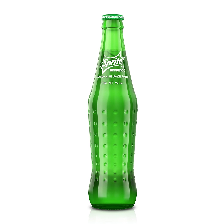

In [47]:
sample_image

In [49]:
sample_array = keras.preprocessing.image.img_to_array(sample_image)
np.argmax(base_model_1.predict(sample_array.reshape(1, 224, 224, 3)))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


1

In [51]:
class_names = keras_train.class_names

In [52]:
class_names[1]

'glass'